<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2DAY14_CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2DAY14: CNN on CIFAR-10

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [3]:
train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


In [4]:
train_dl = DataLoader(train_ds,batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64*10, shuffle=False)

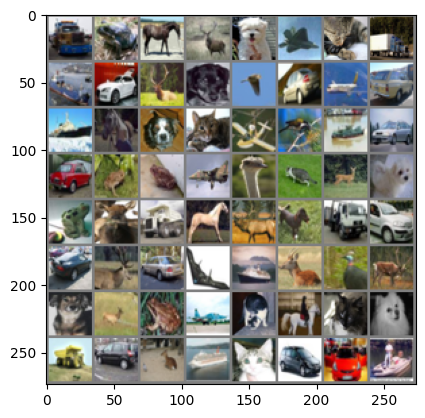

truck frog  horse deer  dog   airplane cat   truck ship  automobile deer  dog   bird  automobile airplane automobile ship  horse dog   cat   airplane bird  ship  automobile automobile frog  frog  airplane bird  cat   deer  dog   frog  deer  truck horse deer  dog   truck automobile automobile deer  automobile airplane ship  deer  bird  deer  dog   deer  frog  airplane cat   horse cat   dog   truck automobile deer  ship  cat   automobile automobile ship 


In [5]:
# prompt: plot a batch from the train
batch_size = 64
classes = train_ds.classes
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_dl)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32,64, 2, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
         x = self.pool(F.relu(self.conv1(x)))
         x = self.pool(F.relu(self.conv2(x)))
         x = x.view(-1, 64 * 8* 8)
         x = F.relu(self.fc1(x))
         return self.fc2(x)

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
model = CIFAR10CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    model.train()
    pbar = tqdm(train_dl, desc=f'Epoch {epoch+1}')
    for i, (images, labels) in enumerate(pbar):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        pbar.set_postfix(loss=running_loss/(i+1)) # Update with average loss so far in the epoch
    print(f"Epoch {epoch+1}, Avg Loss: {running_loss / len(train_dl):.4f}")

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    test_pbar = tqdm(test_dl, desc='Evaluating')
    for images, labels in test_pbar:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_pbar.set_postfix(accuracy=100 * correct / total) # Add accuracy to the test progress bar
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1: 100%|██████████| 782/782 [00:18<00:00, 42.03it/s, loss=1.34]


Epoch 1, Avg Loss: 1.3379


Epoch 2: 100%|██████████| 782/782 [00:15<00:00, 49.65it/s, loss=0.969]


Epoch 2, Avg Loss: 0.9695


Epoch 3:  64%|██████▎   | 497/782 [00:10<00:05, 53.25it/s, loss=0.807]